## ANOMALY DETECTION USING MACHINE LEARNING TECHNIQUES


**Name:** Aumkar Gadekar

**Roll No:** 21

**UID :** 2017130023

**Class :** TE COMPS

**Course :** CSDF LAB

**Experiment No. 5**

**Date - 26/06/2020**

Objective : To detect computer network intrusion using machine learning techniques.

Outcomes:

1) To load dataset in Python or R

2) To process and prepare data

3) Build a model for intrusion detection.

4) Use machine learning algorithms to detect intrusion.

5) Calculate accuracy and confusion matrix and prediction time.

## Background : 
    
Dataset- KDD 99

Attacks fall into four main categories:

DOS: denial-of-service, e.g. syn flood

R2L: unauthorized access from a remote machine, e.g. guessing password

U2R:  unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks

probing: surveillance and other probing, e.g., port scanning.


## Imports

In [567]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [568]:
url= 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
df= pd.read_csv(url, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [569]:
df.columns= [ 
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [570]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [571]:
df.shape

(494021, 42)

## Convert the outcome variable values into one of four categories

In [572]:
df=df.replace(to_replace =["ipsweep.","portsweep.","nmap.","satan."],  
                            value ="probe")
df=df.replace(to_replace =["ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."],  
                            value ="r2l")
df=df.replace(to_replace =["buffer_overflow.","loadmodule.","perl.", "rootkit."],  
                            value ="u2r")
df=df.replace(to_replace =["back.", "land.","neptune.", "pod.","smurf.","teardrop."],  
                            value ="dos")

In [573]:
df['outcome'].unique()

array(['normal.', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [ ]:
ProfileReport(df)

## Label encoding

In [375]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

### Therefore, only three colums : service, protocol type and flag contain string values which need to be converted

In [376]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [377]:
df['protocol_type']= label_encoder.fit_transform(df['protocol_type'])  
df['protocol_type'].unique() 

array([1, 2, 0])

In [378]:
df['service']= label_encoder.fit_transform(df['service'])  
df['service'].unique() 

array([22, 50, 17, 11,  3, 56, 18, 13, 39, 14, 40, 45, 43, 19, 48, 59, 31,
       29, 47, 20, 52, 32, 65, 10, 30, 24,  8,  7, 38, 49,  0, 37, 23, 16,
       44, 15,  5, 62, 26, 27, 12,  9, 55, 54, 25, 21,  6, 42, 53, 63, 34,
       35, 33, 51, 64,  4,  2, 28, 36, 60,  1, 61, 41, 57, 58, 46])

In [379]:
df['flag']= label_encoder.fit_transform(df['flag'])  
df['flag'].unique() 

array([ 9,  6,  1,  7,  5,  8,  2,  4,  3,  0, 10])

In [380]:
df['outcome']= label_encoder.fit_transform(df['outcome'])  
df['outcome'].unique() 

array([1, 4, 0, 3, 2])

In [381]:
list(label_encoder.inverse_transform([0,1,2,3,4]))

['dos', 'normal.', 'probe', 'r2l', 'u2r']

### Exploratory data analysis

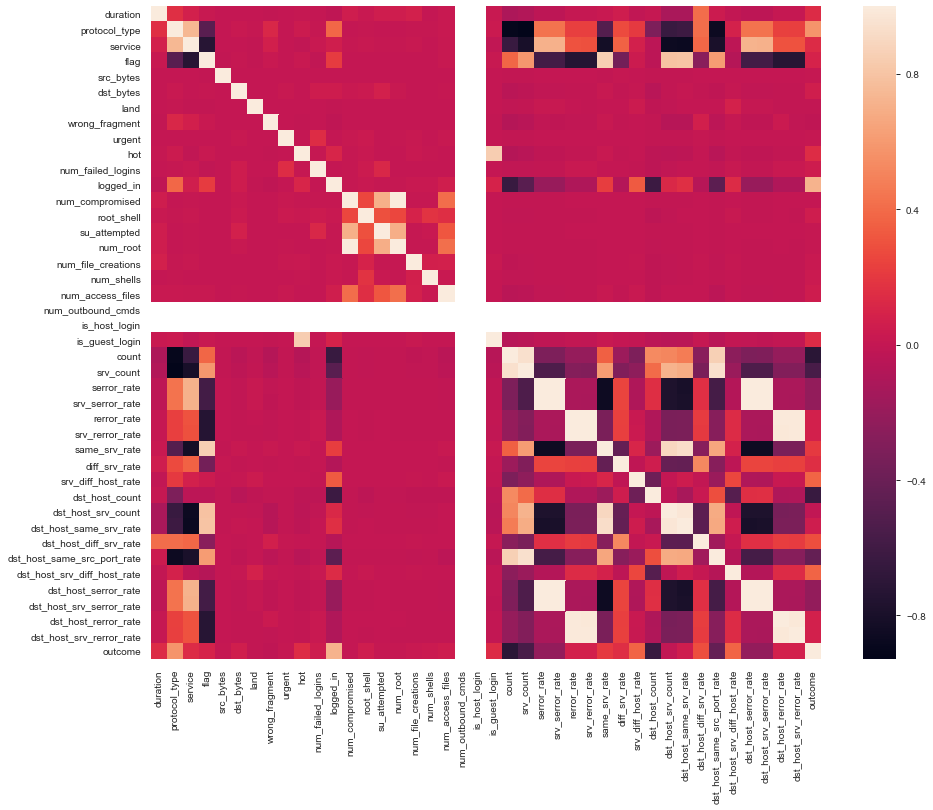

In [382]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [383]:
c=corr.columns

In [384]:
k=0
print('{:>30} {:>30} {:>30}'.format(*["Feature 1","Feature 2","Correlation"]))

for i in c:
    for j in c:
        if((corr[i][j]>0.98) and i!=j and i<j):
            l=len(i)+len(j)
            print('{:>30} {:>30} {:>30}'.format(*[i,j,corr[i][j]]))
            k+=1
print(k)

                     Feature 1                      Feature 2                    Correlation
               num_compromised                       num_root             0.9938277978855619
                   serror_rate                srv_serror_rate             0.9983615072774075
                   rerror_rate                srv_rerror_rate              0.994730953976896
          dst_host_serror_rate                    serror_rate             0.9986729680059853
          dst_host_serror_rate                srv_serror_rate             0.9978353003828665
          dst_host_serror_rate       dst_host_srv_serror_rate             0.9981559173419998
      dst_host_srv_serror_rate                    serror_rate             0.9978492485717336
      dst_host_srv_serror_rate                srv_serror_rate             0.9993041091814926
          dst_host_rerror_rate                    rerror_rate             0.9869947924930166
          dst_host_rerror_rate                srv_rerror_rate         

### Dropping highly correlated columns to reduce feature set

In [385]:
df.drop('num_root',axis = 1,inplace = True)

df.drop('srv_serror_rate',axis = 1,inplace = True)

df.drop('srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

## Machine learning models

In [317]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import metrics

In [318]:
X= df.drop(['outcome'], axis=1)
Y=df['outcome']

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=4 )

In [320]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

### KNN

In [359]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [360]:
knn= KNeighborsClassifier(n_neighbors=3)
start= time.time()
knn.fit(X_train, y_train)
stop= time.time()

In [361]:
print(stop-start)

215.4635899066925


In [362]:
y_pred= knn.predict(X_test)

In [365]:
print(confusion_matrix(y_test, y_pred))

[[78238    10     7     0     0]
 [    4 19510     3     6     0]
 [   39     9   738     0     0]
 [    0     6     0   221     0]
 [    0     6     0     1     7]]


In [366]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.9990789939780376
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78255
           1       1.00      1.00      1.00     19523
           2       0.99      0.94      0.96       786
           3       0.97      0.97      0.97       227
           4       1.00      0.50      0.67        14

   micro avg       1.00      1.00      1.00     98805
   macro avg       0.99      0.88      0.92     98805
weighted avg       1.00      1.00      1.00     98805



The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.With 41 features and a huge training dataset, it takes a lot of time to train as well as test 
Inspite of having high accuracy, it is not feasible option for high performance computing.

### SVM

In [135]:
st = time.time()
svc = LinearSVC()
svc.fit(X_train, y_train)
et = time.time()
print(et-st)

295.406277179718


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [137]:
y_pred=svc.predict(X_test)

In [205]:
print(confusion_matrix(y_test, y_pred))

[[77742    34     0   478     1]
 [  248 18992     7   274     2]
 [   12    62   712     0     0]
 [    0    43     0   184     0]
 [    0    14     0     0     0]]


In [206]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.9881078892768584
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     78255
           1       0.99      0.97      0.98     19523
           2       0.99      0.91      0.95       786
           3       0.20      0.81      0.32       227
           4       0.00      0.00      0.00        14

   micro avg       0.99      0.99      0.99     98805
   macro avg       0.64      0.74      0.65     98805
weighted avg       0.99      0.99      0.99     98805



In [387]:
#SVM performs rather poorly on two classes

### Random forest

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
st = time.time()
rf = RandomForestClassifier(random_state=20,n_estimators=20)
rf.fit(X_train, y_train)
et=time.time()
print("Time =",et-st)

Time = 3.9724276065826416


In [356]:
y_preds=rf.predict(X_test)

In [357]:
print(confusion_matrix(y_test, y_preds))

[[78253     2     0     0     0]
 [    3 19515     3     1     1]
 [    0     5   781     0     0]
 [    0     3     0   224     0]
 [    0     6     0     0     8]]


In [367]:
print("Accuracy:",metrics.accuracy_score(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

Accuracy: 0.999757097312889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78255
           1       1.00      1.00      1.00     19523
           2       1.00      0.99      0.99       786
           3       1.00      0.99      0.99       227
           4       0.89      0.57      0.70        14

   micro avg       1.00      1.00      1.00     98805
   macro avg       0.98      0.91      0.94     98805
weighted avg       1.00      1.00      1.00     98805



The random forest classifier gives an excellent accuracy of 99.98%, it outperforms all other classifiers and trains very fast as well. The fast prediction and training rate makes it the best choice. The given database responds well to decision support systems. It has a very good f1 score for 4 out of 5 categories of attacks

Training time : 3.5 seconds

### Neural Networks

In [537]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim=33, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [538]:
from numpy import argmax
from keras.utils import to_categorical
encoded = to_categorical(y_train)
print(encoded[0])
encode_test = to_categorical(y_test)

[1. 0. 0. 0. 0.]


In [539]:
y_train.value_counts()

0    313203
1     77755
2      3321
3       899
4        38
Name: outcome, dtype: int64

In [540]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [541]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 50)                1700      
_________________________________________________________________
dense_65 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_66 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_67 (Dense)             (None, 5)                 55        
Total params: 3,290
Trainable params: 3,290
Non-trainable params: 0
_________________________________________________________________


In [556]:
model.fit(X_train,y_train, epochs=2, batch_size=10,validation_data=(X_test, y_test))

Train on 395216 samples, validate on 98805 samples
Epoch 1/2
395216/395216 [==============================] - 41s 103us/step - loss: 0.2150 - acc: 0.9899 - val_loss: 0.1136 - val_acc: 0.9914
Epoch 2/2
395216/395216 [==============================] - 43s 109us/step - loss: 0.2096 - acc: 0.9883 - val_loss: 0.1158 - val_acc: 0.9880


In [557]:
model.evaluate(X_test,y_test)

98805/98805 [==============================] - 2s 15us/step


[0.11575801509877479, 0.9880168007691918]

In [558]:
y_pred=model.predict(X_test)

In [559]:
y_pred

array([[0.99999976, 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.7275511 , 0.        , 0.        ],
       ...,
       [0.999999  , 0.        , 0.        , 0.        , 0.        ],
       [0.99934936, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [560]:
matrix = metrics.confusion_matrix(encode_test.argmax(axis=1), y_pred.argmax(axis=1))


In [561]:
print(matrix)

[[77740   514     1     0     0]
 [  380 19140     3     0     0]
 [   12    33   741     0     0]
 [  137    90     0     0     0]
 [    0    14     0     0     0]]


In [562]:
print("Accuracy:",metrics.accuracy_score(encode_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(metrics.classification_report(encode_test.argmax(axis=1), y_pred.argmax(axis=1)))

Accuracy: 0.9880168007691918
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     78255
           1       0.97      0.98      0.97     19523
           2       0.99      0.94      0.97       786
           3       0.00      0.00      0.00       227
           4       0.00      0.00      0.00        14

   micro avg       0.99      0.99      0.99     98805
   macro avg       0.59      0.58      0.59     98805
weighted avg       0.99      0.99      0.99     98805



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [392]:
df.outcome.value_counts()

0    391458
1     97278
2      4107
3      1126
4        52
Name: outcome, dtype: int64

In [564]:
X_train.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,395216.000000,395216.000000,395216.000000,395216.000000,3.952160e+05,3.952160e+05,395216.000000,395216.000000,395216.000000,395216.000000,...,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000
mean,47.479983,0.466929,23.408050,7.843061,3.491786e+03,8.487074e+02,0.000035,0.006505,0.000015,0.033716,...,0.176638,0.057393,0.791666,0.021021,0.028929,232.499717,188.734462,0.030904,0.602272,0.006725
std,695.589964,0.575782,13.539006,2.250313,1.104747e+06,3.178838e+04,0.005952,0.135575,0.005952,0.773218,...,0.380669,0.231549,0.388101,0.082488,0.142353,64.716512,106.000303,0.109343,0.481234,0.042471
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,9.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,14.000000,9.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,42.000000,9.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.040000,1.000000,0.000000
max,42448.000000,2.000000,65.000000,10.000000,6.933756e+08,5.153771e+06,1.000000,3.000000,3.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000
